## Planets nests tutorial 

A simple tutorial to decompose example deep moonquake waveforms using the principal component analysis. 


## Getting set up 

### Where is the code? 

you can find the code in /home/earthquakes1/homes/Alice/Planets

(copy to your home maybe ? ) 

### conda enviroment 

This code only needs obspy create an enviroment following. 

```

$ conda create -n obspy python=3.7   # or other supported Python version
$ conda activate obspy  # this command used to be 'source activate obspy' on older conda versions < 4.4
(obspy) $ 
(obspy) $ conda install obspy

```


### adding lib to python path 

in your tcsh profile you will have to add the lib to the pythonpath. It should be something like: 

```
vi ~/.cshrc

```

Then add the line something like: 

```

setenv PYTHONPATH ${PYTHONPATH}:/home/earthquakes1/homes/Alice/Planets/lib

```

### Running 

This jupyter notebook calls scripts from planetseis_Xcorr_time_listin.py

In [38]:
#having a go at running 

import planetseis_Xcorr_time_listin 
ds = planetseis_Xcorr_time_listin.dstack()
ds.setup('/home/earthquakes1/homes/Alice/Planets/input_lists/S16_MHN_peaked_with_time_RESAMPLETRY2_nomaster.txt','single_moonquake',[100,700])
#the setup giving a list of events, and then the final part is the timewindow 
ds.xcorr(master = ds.adata[:,0,0,0,0]) #alligning the events using cross correlation 
print("XCORR DONE")
print("FINE TUNE")
ds.iterative_grid_fine_tune(search_range =5, temp = 1000, Niter = 100) #fine tune the timeshifts using PCA 
print("FINE TUNE DONE")
print(ds.ishfs.flatten())
ds.replaceadata(iev=ds.iev,ichan = ds.ichan,istat = ds.istat,ifreq = ds.ifreq)
ds.initadata()
ds.calcperclow_saved() #calculate the components using PCA 

#outputs 
#ds.S = this is the eigenvalues of the 
#ds.U = the eigenvectors (slip directions )
#ds.V = weights for each event in each slip direction 

##ADD a plot 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
XCORR DONE
FINE TUNE
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
FINE TUNE DONE
[1325 1344  521 1269 1314  547 1251 1274 1253 1267 1295 1263 1217 1270
 1298 1268 1311 1328 1274 1261 1312 1251 1305 1305 1290 1351 1272 1308
 1306]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
XCORR DONE
FINE TUNE
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
6

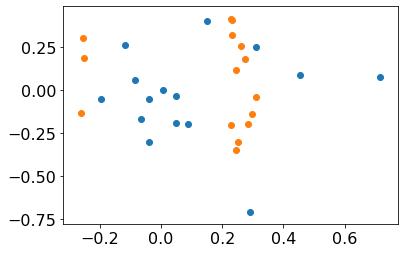

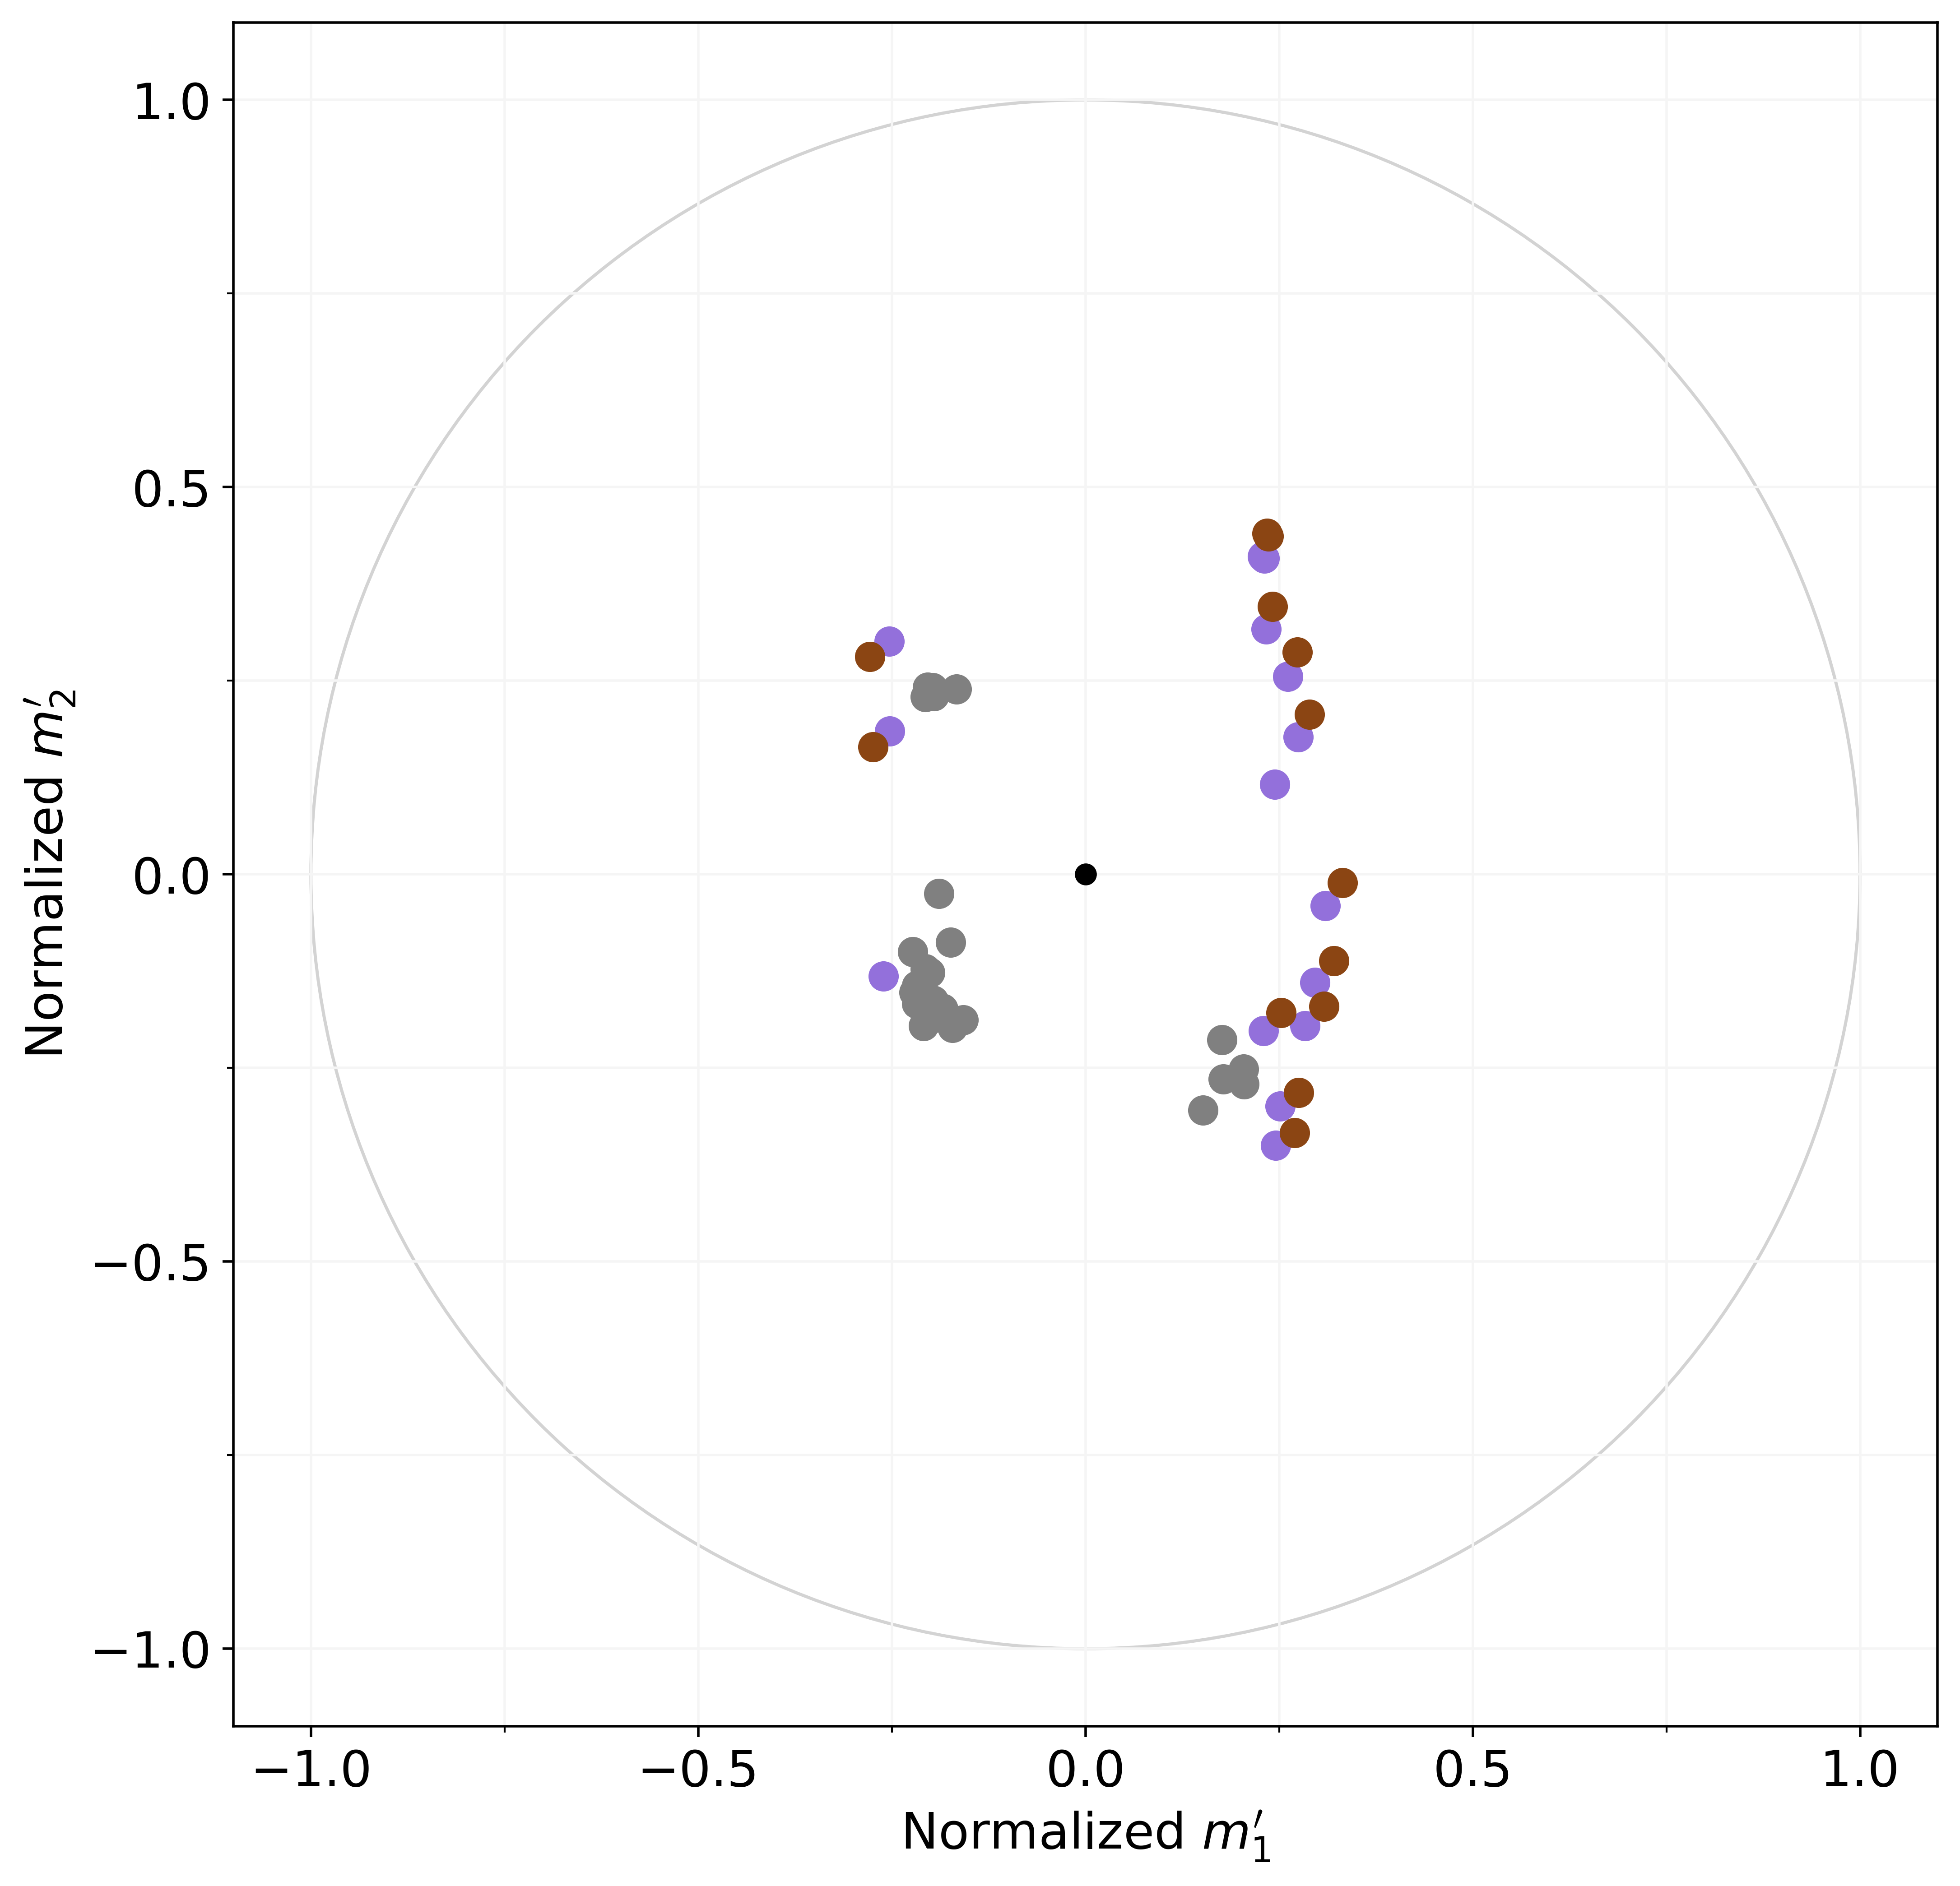

In [42]:
plt.scatter(ds.V[:,0],ds.V[:,1])

plt.scatter(ds.V[0,:],ds.V[1,:])

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(10, 10), dpi=500)
plt.rcParams.update({'font.size': 16})
ax = fig.add_subplot(111)

circle1 = plt.Circle((0, 0), 1, color='lightgrey', fill=False,zorder=1)

s12_mhn_norm = (V_s12_MHN[0,:]**2 + V_s12_MHN[1,:]**2)
s12_mhe_norm = (V_s12_MHE[0,:]**2 + V_s12_MHE[1,:]**2)

s16_mhn_norm = (V_s16_MHN[0,:]**2 + V_s16_MHN[1,:]**2)
s16_mhe_norm = (V_s16_MHE[0,:]**2 + V_s16_MHE[1,:]**2)

plt.scatter(V_s16_MHN[0,:]/s16_mhn_norm,V_s16_MHN[1,:]/s16_mhn_norm,zorder=2,s=75,color = 'pink')
plt.scatter(V_s12_MHN[0,:],V_s12_MHN[1,:],zorder=2,s=75,color = 'mediumpurple')
plt.scatter(V_s12_MHE[0,:],V_s12_MHE[1,:],zorder=2,s=75,color = 'saddlebrown')
plt.scatter(V_s16_MHE[0,:],V_s16_MHE[1,:],zorder=2,s=75,color = 'grey')
plt.grid()
plt.scatter(0,0,color='k',zorder=2)

ax.add_patch(circle1)

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
plt.grid(color='whitesmoke',which='both',zorder=0)
ax.set_xlabel("Normalized $m_{1}'$")
ax.set_ylabel("Normalized $m_{2}'$")
ax.set_aspect('equal', adjustable='box')

plt.savefig('moonquake_circle_plot2.png',dpi=1500,bbox_inches='tight')

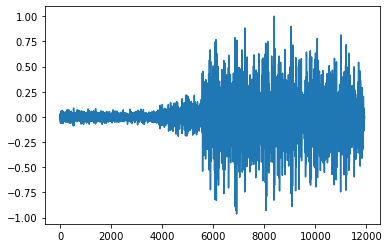

[-0.20730438  0.1347076   0.1197414  -0.03641093  0.07638192 -0.05709701
  0.00156188  0.06065614 -0.07224595  0.06243339  0.02081175  0.00888491
 -0.07120442 -0.02142278 -0.02630512  0.05830865  0.07042514  0.01416366
 -0.01904608 -0.08605523 -0.088701   -0.04884611  0.00167531  0.06876708
  0.02519787  0.00200697  0.06786993 -0.66086333  0.64906784]
-0.20055646496149238
-0.16891823473163903


(5000, 5500)

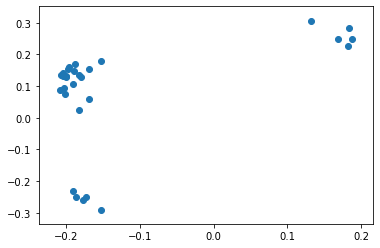

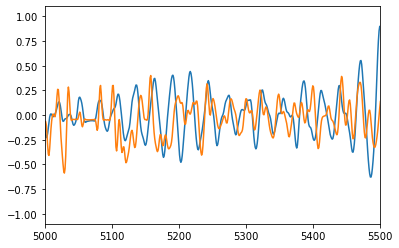

In [32]:
import matplotlib.pyplot as plt
plt.plot(ds.data[:,0,0,0])
plt.show()

plt.scatter(ds.V[0,:],ds.V[1,:])
print(ds.V[:,0])
print(ds.V[0,16])
print(ds.V[0,17])
plt.figure()
plt.plot(ds.data[:,12,0,0])
plt.plot(ds.data[:,13,0,0])
plt.xlim(5000,5500)

In [ ]:
#bootstrapping - to test the stability of the slip directions that are recovered 
import planetseis_Xcorr_time_listin
from bootstrapping_U import *
import multiprocessing as mp
import matplotlib.pyplot as plt
import numpy as np
import glob

make_projection_list('/home/earthquakes1/homes/Alice/Planets/input_lists/S12_MHN_flat_with_time_RESAMPLETRY2_nomaster.txt') #makes the lists of events to exclude for energy calclulation 

#running the energy calculation on the original data (IMPORTATNT YOU NEED TO GO IN AND EDIT THE MASTER IN THIS FUNCTION)
projlist = glob.glob('/home/earthquakes1/homes/Alice/Planets/input_lists/S12_MHN_flat_with_time_RESAMPLETRY2_nomaster/*')

for file in projlist:
    mp_function_original_S12(file)
    #also making the bootstrapped lists for each of the projection lists 
    make_bootstrap_lists(file)
#### bootstrapping
r = making_glob_list_boot('S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster') # for each resampled event bootstrap the other events in the list 
# The input is the folder of events (same as in the previous step)
pool = mp.Pool(mp.cpu_count())

results = pool.map(mp_function, [list for list in r])

np.save('results.npy',results)




In [ ]:
#plotting bootstrapped energy 
#IN COMAND LINE RUN: 
#you will have to change paths and also change the size of the arrays to the number of events that you have
##python plotting_bootstrap.py 

## plotting bootstrapping 

save the U bootstraps  in shape (number of bootstraps, time lenght , number of events) and run 

```
icasar_moonquake.py

```

should make something that looks like: 

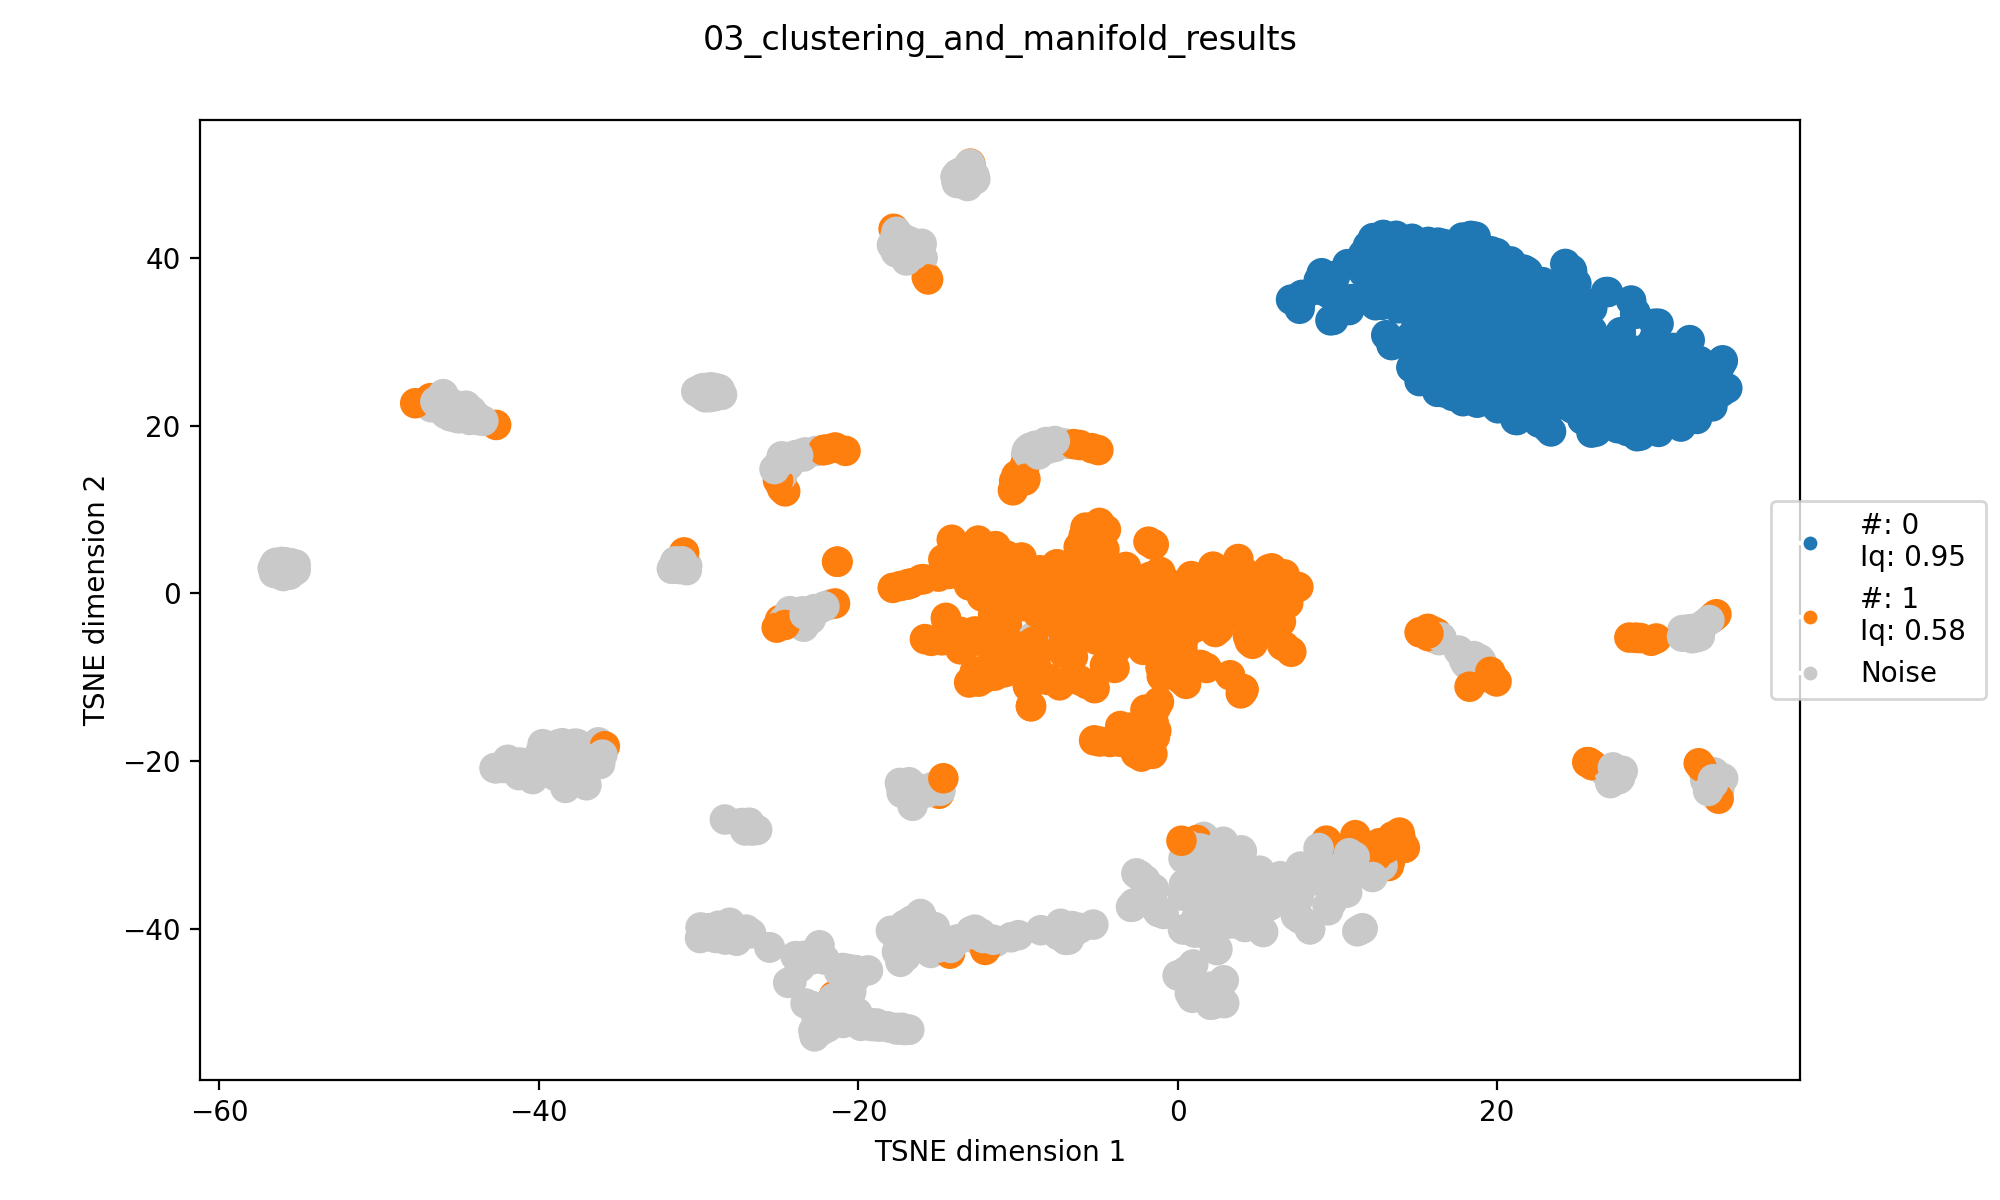

In [3]:

from bootstrapping_U import *
r = making_glob_list_boot('S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster')
print(r)

['/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/0.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/1.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/2.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/3.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/4.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/5.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/6.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/7.txt', '/home/earthquakes1/homes/Alice/Planets/bootlists/S12_MHN_peaked_with_time_RESAMPLETRY2_nomaster-0/8.txt', '/home/earthquakes1/homes/Alice/Plan